<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<hr style="height:2px;border:none"/>

<h4 align='left'> Integrantes: </h4>
<p align='left'> Alfredo Silva Celpa 201373511-8 </p>
<p align='left'> Margarita Bugueño Pérez 201373510-k </p>
<hr style="height:2px;border:none"/>


**Temas**  
* Entrenamiento de redes *Feed-Forward* vı́a GD y variantes (SGD, mini-*batches*), *momentum*, regularización y tasa de aprendizaje adaptiva.
* Evaluación de redes *Feed-Forward* vı́a validación cruzada (cross-validation).
* Rol de capas ocultas y mayor profundidad (*Deep Learning*).
* Identificar el gradiente desvaneciente.
* Diseño y entrenamiento de Redes Convolucionales (CNNs).
 

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y discusión: 04 Abril
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea1-INF395-I-2018]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Predicción del precio de una Casa  
[2.](#segundo) *Deep Networks*  
[3.](#tercero) Convolutional Neural Network (CNN) en CIFAR.  
[4.](#cuarto) Aplicación de una red neuronal en Localización

<a id="segundo"></a>
## 2. Deep Networks
Las *deep network*, o lo que hoy en día se conoce como *deep learning*, hace referencia a modelos de redes neuronales estructurados con muchas capas, es decir, el cómputo de la función final es la composición una gran cantidad de funciones ( $f^{(n)} = f^{(n-1)} \circ f^{(n-2)} \circ \cdots \circ f^{(2)} \circ f^{(1)} $ con $n \gg 0$ ).  
Este tipo de redes neuronales tienen una gran cantidad de parámetros, creciendo exponencialmente por capa con las redes *feed forward*, siendo bastante dificiles de entrenar comparadas con una red poco profunda, esto es debido a que requieren una gran cantidad de datos para ajustar correctamente todos esos parámetros. Pero entonces ¿Cuál es el beneficio que tienen este tipo de redes? ¿Qué ganancias trae el añadir capas a una arquitectura de una red neuronal?  

<img src="http://neuralnetworksanddeeplearning.com/images/tikz36.png" title="Title text" width="80%" height="20%" />



En esta sección se estudiará la complejidad de entrenar redes neuronales profundas, mediante la visualización de los gradientes de los pesos en cada capa, el cómo varía mientras se hace el *backpropagation* hacia las primeras capas de la red. 

> a) Se trabajará con las etiquetas escaladas uniformemente, es decir, $\mu=0$ y $\sigma=1$, ajuste sobre el conjunto de entrenamiento y transforme éstas además de las de pruebas.
```python
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
y_train_scaled = X_train_scaled.pop('MEDV').values.reshape(-1,1)
```
> b) Para el mismo problema definido anteriormente ([sección 1](#primero)) se entrenará diferentes redes. En esta primera instancia se trabajará con la misma red de la pregunta b), inicializada con pesos uniforme. Visualice el gradiente de la función de pérdida (*loss*) para el conjunto de entrenamiento respecto a los pesos en las distintas capas, para esto se le pedirá el cálculo del gradiente para una capa mediante la función de *gradients* (__[link](https://www.tensorflow.org/api_docs/python/tf/keras/backend/gradients)__) en el *backend* de Keras. Deberá generar un **histograma** para todos los pesos de cada capa antes y despues del entrenamiento con 300 *epochs*. Comente.

```python
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
###calculate gradients
from keras import backend as K
import tensorflow as tf
loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]
```
> c) Vuelva a generar los histogramas para los gradientes de los pesos de cada capa antes y después del entrenamiento pero ahora entrenando una red mucho mas profunda de 6 capas, 5 capas escondidas y 1 de salida. Utilice el inicializador de pesos *uniform* el cual inicializa mediante una distribución uniforme entre $-1/\sqrt{N}$ y $1/\sqrt{N}$ para cada capa, con $N$ el número de neuronas de la capa anterior. Por simplicidad visual visualice las 3-4 primeras capas de la red. Comente si observa el efecto del *gradiente desvaneciente* antes y/o después de entrenar.

```python
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200,  kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
```

> d) Vuelva a generar los histogramas para los gradientes de los pesos de cada capa antes y después del entrenamiento, pero ahora entrenando la red profunda con el inicializador de Glorot [[1]](#refs), es decir, una distribución uniforme entre -$\sqrt{6/(N_{in}+N_{out})}$  y $\sqrt{6/(N_{in}+N_{out})}$ . Por simplicidad visualice las 3-4 primeras capas de la red. Comente si el efecto del *gradiente desvaneciente* se amortigua antes y/o después de entrenar.

```python
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200,  kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
```

> e) Vuelva a repetir la experimentación ahora cambiando la función de activación por ReLU, es decir, deberá visualizar los gradientes de los pesos de cada capa antes y después del entrenamiento, con inicialización *uniform* y comparar con la inicialización de He [[2]](#refs), es decir, una distribución uniforme entre -$\sqrt{6/N_{in}}$ y $\sqrt{6/N_{in}} $. Comente si ocurre el mismo fenómeno anterior (para función sigmoidal) sobre el efecto del *gradiente desvaneciente* para la función ReLU. Explique la importancia de la inicialización de los pesos dependiendo de la arquitectura.

```python
#uniform
...
model.add(Dense(200, kernel_initializer='uniform',activation='relu'))
...
#he initializer
...
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
...
```
> e) ¿Qué es lo que sucede con la red más profunda? ¿El modelo logra convergencia en su entrenamiento? Modifique aspectos estructurales (funciones de activación, inicializadores, regularización, *momentum*, variación de tasa de aprendizaje, entre otros) de la red profunda de 6 capas definida anteriormente (no modifique la profundidad ni el número de neuronas) para lograr un error cuadrático medio (*mse*) similar o menor al de una red no profunda, como la definida en b) en esta sección, sobre el conjunto de pruebas.

> f) Pruebe con utilizar una red *shallow* (poco profunda), es decir, sitúe todas las neuronas en una única capa ¿Qué sucede con la convergencia del algoritmo? ¿Por qué sucede este fenómeno?
```python
model = Sequential()
model.add(Dense(1000, input_dim=X_train_scaled.shape[1], kernel_initializer='choose',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='choose',activation='linear'))
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), epochs=300,
    verbose=1, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
```

In [1]:
#a) importacion de datos 
import pandas as pd
from sklearn.cross_validation import train_test_split

url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
#CHAS, variabole categorica
df = pd.get_dummies(df,columns=["CHAS"])
df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)

from sklearn.preprocessing  import StandardScaler
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
y_train = X_train_scaled.pop('MEDV').values.reshape(-1,1)


f:\anaconda2\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Se vuelve a realizar el tratamiento previo de la información realizado en la pregunta anterior, de manera que quede lista para ser utilizada en las redes neuronales de las siguientes actividades.

f:\anaconda2\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
f:\anaconda2\envs\tensorflow\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


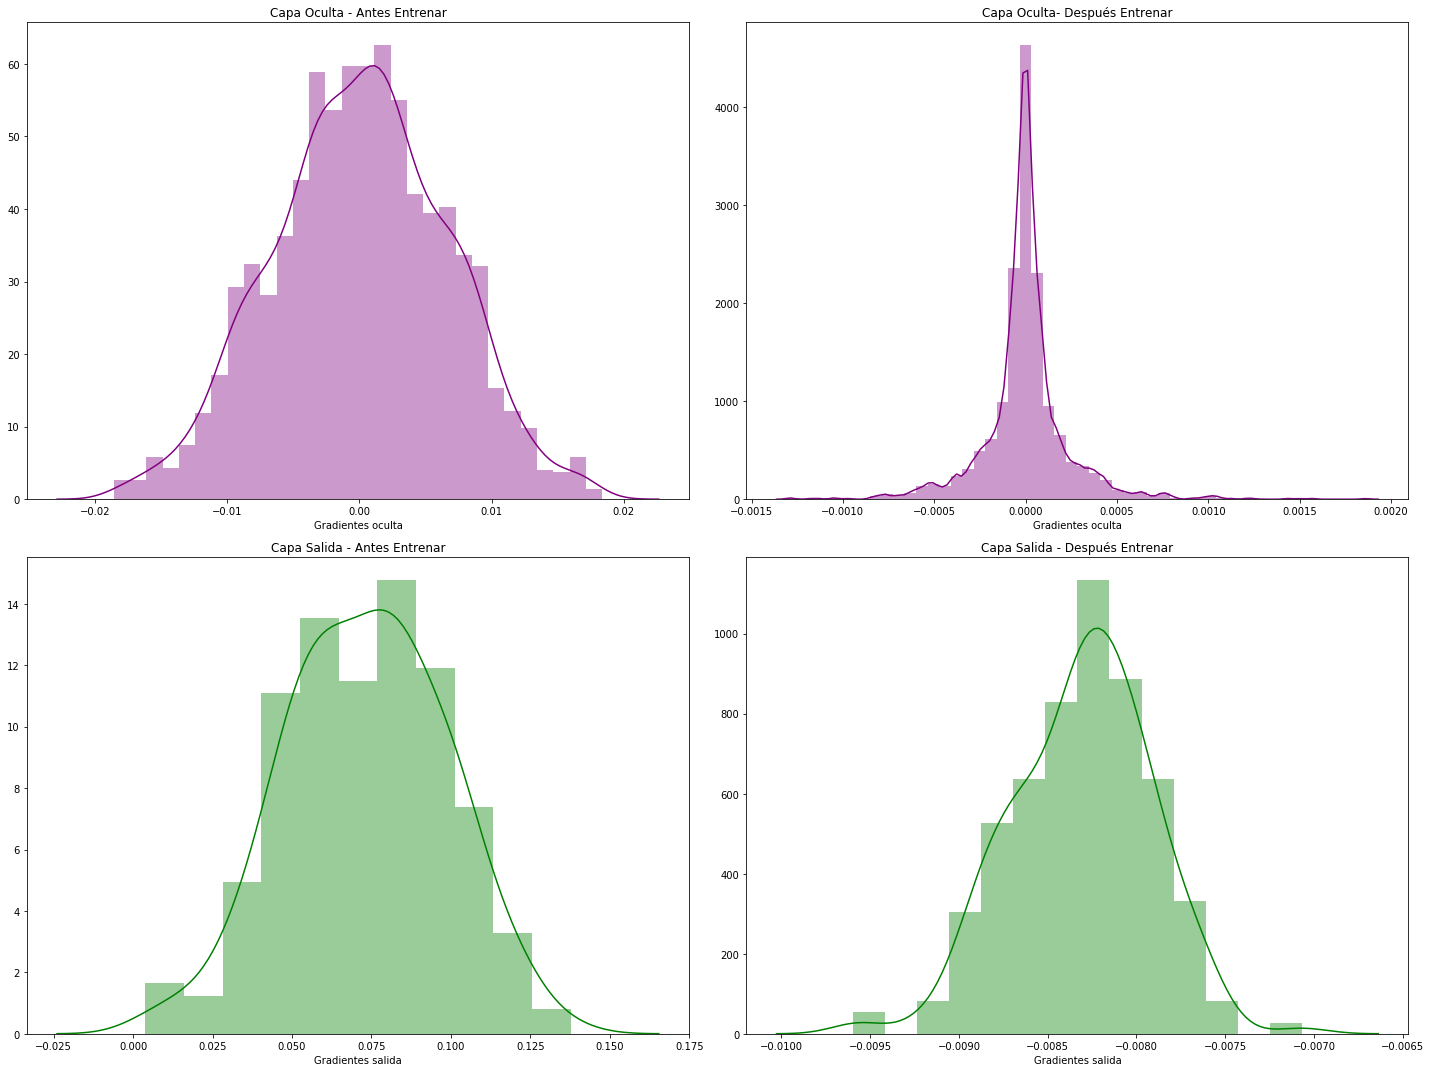

In [9]:
#b
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
import seaborn as sns
%matplotlib inline

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

###calculate gradients
from keras import backend as K
import tensorflow as tf
loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
#print(gradients)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

pesos_oculta_i = evaluated_gradients[0].flatten()
pesos_salida_i = evaluated_gradients[2].flatten()

history1 = model.fit(X_train_scaled, y_train, epochs=300, verbose=False)


###calculate gradients
from keras import backend as K
import tensorflow as tf
loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
#print(gradients)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

pesos_oculta_f = evaluated_gradients[0].flatten()
pesos_salida_f = evaluated_gradients[2].flatten()

#estos histogramas aun son place-holder
import matplotlib.pyplot as plt
A,B = plt.subplots(2,2,figsize=(20,15))

sns.distplot(pesos_oculta_i, axlabel="Gradientes oculta",
             label='Gradientes oculta', color='purple', ax=B[0,0]);
B[0,0].set_title("Capa Oculta - Antes Entrenar")

sns.distplot(pesos_oculta_f, axlabel="Gradientes oculta",
             label='Gradientes oculta', color='purple', ax=B[0,1]);
B[0,1].set_title("Capa Oculta- Después Entrenar")

sns.distplot(pesos_salida_i, axlabel="Gradientes salida",
             label='Gradientes salida', color='green', ax=B[1,0]);
B[1,0].set_title("Capa Salida - Antes Entrenar")

sns.distplot(pesos_salida_f, axlabel="Gradientes salida",
             label='Gradientes salida', color='green', ax=B[1,1]);
B[1,1].set_title("Capa Salida - Después Entrenar")

plt.tight_layout()
A.show();


Se puede ver claramente como la distribución de los gradientes pierden varianza al entrenar la red, el efecto se ve aumentado en la capa oculta, sobre todo por la utilización de la función de activación sigmoidal, cuyas zonas de no linearidad inducen el problema de los gradientes desvanecientes. 
En la capa de salida no se observa el problema de manera tan grave como en la oculta, pues además de ser la directa responsable del error (es decir el gradiente no conlleva una cadena) la funcion utilizada es de activación lineal.

f:\anaconda2\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
f:\anaconda2\envs\tensorflow\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


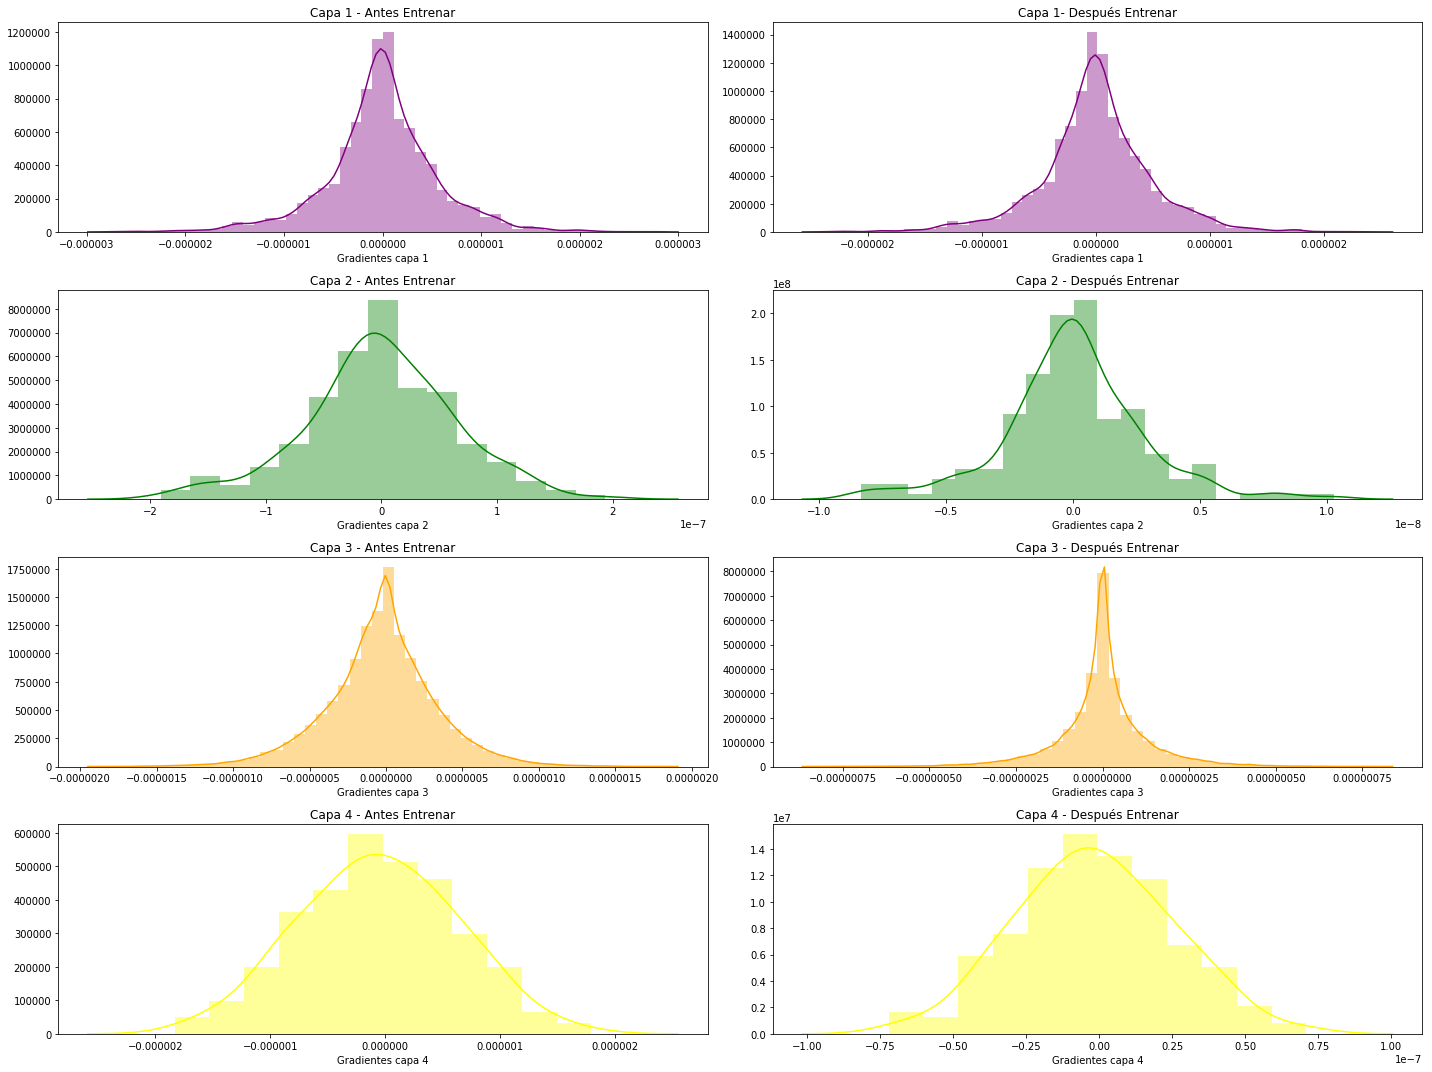

In [19]:
#c
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
%matplotlib inline
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200,  kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

###calculate gradients
from keras import backend as K
import tensorflow as tf
loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
#print(gradients)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

pesos_0_i = evaluated_gradients[0].flatten()
pesos_1_i = evaluated_gradients[1].flatten()
pesos_2_i = evaluated_gradients[2].flatten()
pesos_3_i = evaluated_gradients[3].flatten()

history = model.fit(X_train_scaled, y_train, epochs=300, verbose=False)

loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
#print(gradients)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

pesos_0_f = evaluated_gradients[0].flatten()
pesos_1_f = evaluated_gradients[1].flatten()
pesos_2_f = evaluated_gradients[2].flatten()
pesos_3_f = evaluated_gradients[3].flatten()


#estos histogramas aun son place-holder
import matplotlib.pyplot as plt
A,B = plt.subplots(4,2,figsize=(20,15))

sns.distplot(pesos_0_i, axlabel="Gradientes capa 1",
             label='Gradientes capa 1', color='purple', ax=B[0,0]);
B[0,0].set_title("Capa 1 - Antes Entrenar")

sns.distplot(pesos_0_f, axlabel="Gradientes capa 1",
             label='Gradientes capa 1', color='purple', ax=B[0,1]);
B[0,1].set_title("Capa 1- Después Entrenar")

sns.distplot(pesos_1_i, axlabel="Gradientes capa 2",
             label='Gradientes capa 2', color='green', ax=B[1,0]);
B[1,0].set_title("Capa 2 - Antes Entrenar")

sns.distplot(pesos_1_f, axlabel="Gradientes capa 2",
             label='Gradientes capa 2', color='green', ax=B[1,1]);
B[1,1].set_title("Capa 2 - Después Entrenar")

sns.distplot(pesos_2_i, axlabel="Gradientes capa 3",
             label='Gradientes capa 3', color='orange', ax=B[2,0]);
B[2,0].set_title("Capa 3 - Antes Entrenar")

sns.distplot(pesos_2_f, axlabel="Gradientes capa 3",
             label='Gradientes capa 3', color='orange', ax=B[2,1]);
B[2,1].set_title("Capa 3 - Después Entrenar")

sns.distplot(pesos_3_i, axlabel="Gradientes capa 4",
             label='Gradientes capa 4', color='yellow', ax=B[3,0]);
B[3,0].set_title("Capa 4 - Antes Entrenar")

sns.distplot(pesos_3_f, axlabel="Gradientes capa 4",
             label='Gradientes capa 4', color='yellow', ax=B[3,1]);
B[3,1].set_title("Capa 4 - Después Entrenar")

plt.tight_layout()
A.show();

Si bien la forma de la distribución suele mantenerse (con la excepción de la tercer capa oculta), la varianza de las distribuciones se ve fuertemente afectada, se reduce en exponentes de significancia, una vez más esto es producto del uso de la función de activación sigmoidal en las capas ocultas de la red, ya que sus zonas de no linearidad tienen gradientes muy cercanos al 0, de manera que se desvanecen durante el entrenamiento.

f:\anaconda2\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
f:\anaconda2\envs\tensorflow\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


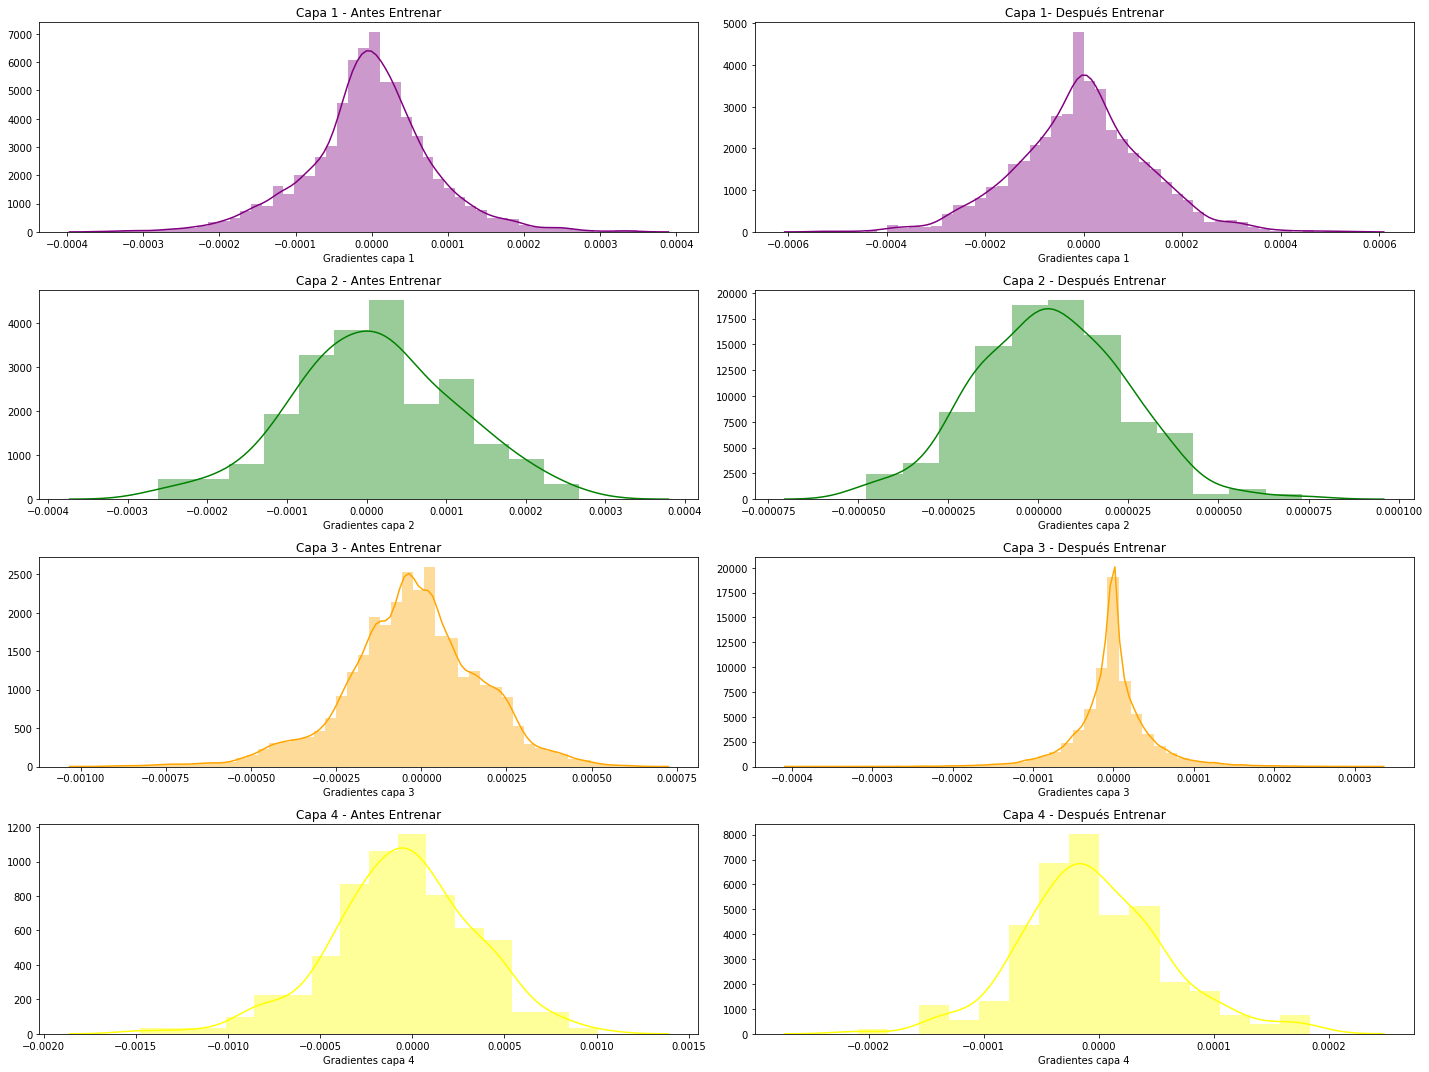

In [15]:
#d
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200,  kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')


###calculate gradients
from keras import backend as K
import tensorflow as tf
loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
#print(gradients)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

pesos_0_i = evaluated_gradients[0].flatten()
pesos_1_i = evaluated_gradients[1].flatten()
pesos_2_i = evaluated_gradients[2].flatten()
pesos_3_i = evaluated_gradients[3].flatten()

history = model.fit(X_train_scaled, y_train, epochs=300, verbose=False)

loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
#print(gradients)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

pesos_0_f = evaluated_gradients[0].flatten()
pesos_1_f = evaluated_gradients[1].flatten()
pesos_2_f = evaluated_gradients[2].flatten()
pesos_3_f = evaluated_gradients[3].flatten()

#estos histogramas aun son place-holder
import matplotlib.pyplot as plt
A,B = plt.subplots(4,2,figsize=(20,15))

sns.distplot(pesos_0_i, axlabel="Gradientes capa 1",
             label='Gradientes capa 1', color='purple', ax=B[0,0]);
B[0,0].set_title("Capa 1 - Antes Entrenar")

sns.distplot(pesos_0_f, axlabel="Gradientes capa 1",
             label='Gradientes capa 1', color='purple', ax=B[0,1]);
B[0,1].set_title("Capa 1- Después Entrenar")

sns.distplot(pesos_1_i, axlabel="Gradientes capa 2",
             label='Gradientes capa 2', color='green', ax=B[1,0]);
B[1,0].set_title("Capa 2 - Antes Entrenar")

sns.distplot(pesos_1_f, axlabel="Gradientes capa 2",
             label='Gradientes capa 2', color='green', ax=B[1,1]);
B[1,1].set_title("Capa 2 - Después Entrenar")

sns.distplot(pesos_2_i, axlabel="Gradientes capa 3",
             label='Gradientes capa 3', color='orange', ax=B[2,0]);
B[2,0].set_title("Capa 3 - Antes Entrenar")

sns.distplot(pesos_2_f, axlabel="Gradientes capa 3",
             label='Gradientes capa 3', color='orange', ax=B[2,1]);
B[2,1].set_title("Capa 3 - Después Entrenar")

sns.distplot(pesos_3_i, axlabel="Gradientes capa 4",
             label='Gradientes capa 4', color='yellow', ax=B[3,0]);
B[3,0].set_title("Capa 4 - Antes Entrenar")

sns.distplot(pesos_3_f, axlabel="Gradientes capa 4",
             label='Gradientes capa 4', color='yellow', ax=B[3,1]);
B[3,1].set_title("Capa 4 - Después Entrenar")

plt.tight_layout()
A.show();

Se vuelve a disminuir la varianza de la distribución aunque suele mantener su forma (otra vez esta cambia drasticamente en la tercera capa), el efecto ya no es tan fuerte como en la red anterior, la disminución ya no fue a nivel de cifras significativas, sino que se mantuvo dentro de un rango más aceptable, pero no deja de existir el problema. Se puede decir que la inicialización de los pesos retrasó el problema de los gradientes desvanecientes

f:\anaconda2\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
f:\anaconda2\envs\tensorflow\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


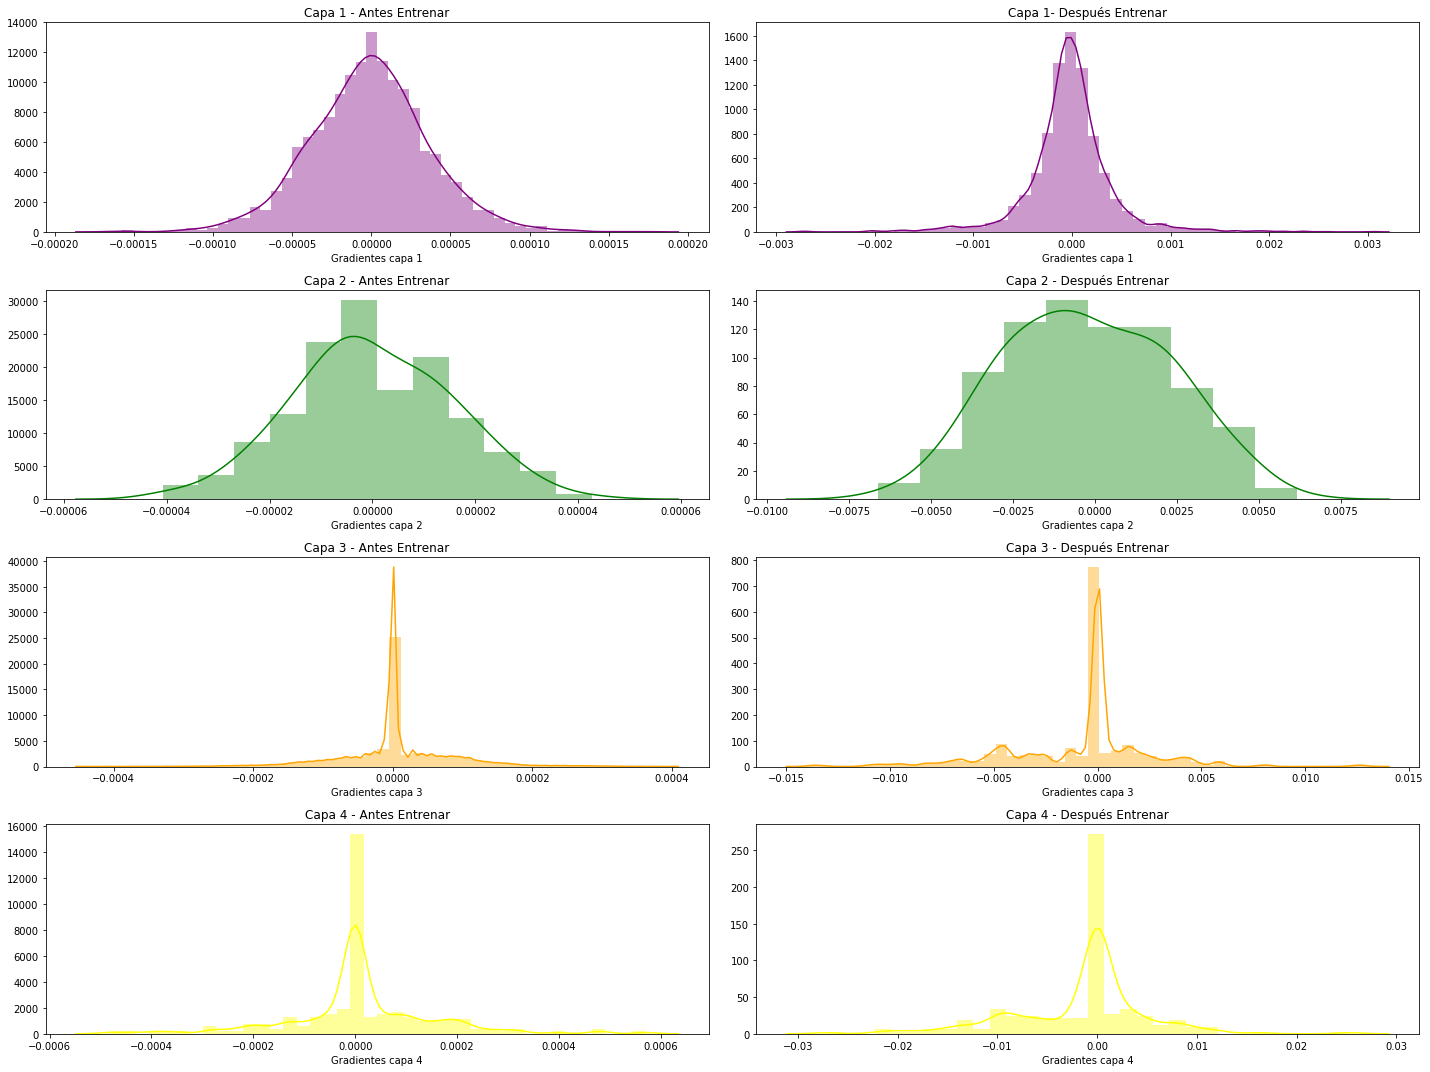

In [16]:
#e
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='relu'))
model.add(Dense(200,  kernel_initializer='uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')


###calculate gradients
from keras import backend as K
import tensorflow as tf
loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
#print(gradients)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

pesos_0_i = evaluated_gradients[0].flatten()
pesos_1_i = evaluated_gradients[1].flatten()
pesos_2_i = evaluated_gradients[2].flatten()
pesos_3_i = evaluated_gradients[3].flatten()

history = model.fit(X_train_scaled, y_train, epochs=300, verbose=False)

loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
#print(gradients)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

pesos_0_f = evaluated_gradients[0].flatten()
pesos_1_f = evaluated_gradients[1].flatten()
pesos_2_f = evaluated_gradients[2].flatten()
pesos_3_f = evaluated_gradients[3].flatten()

#estos histogramas aun son place-holder
import matplotlib.pyplot as plt
A,B = plt.subplots(4,2,figsize=(20,15))

sns.distplot(pesos_0_i, axlabel="Gradientes capa 1",
             label='Gradientes capa 1', color='purple', ax=B[0,0]);
B[0,0].set_title("Capa 1 - Antes Entrenar")

sns.distplot(pesos_0_f, axlabel="Gradientes capa 1",
             label='Gradientes capa 1', color='purple', ax=B[0,1]);
B[0,1].set_title("Capa 1- Después Entrenar")

sns.distplot(pesos_1_i, axlabel="Gradientes capa 2",
             label='Gradientes capa 2', color='green', ax=B[1,0]);
B[1,0].set_title("Capa 2 - Antes Entrenar")

sns.distplot(pesos_1_f, axlabel="Gradientes capa 2",
             label='Gradientes capa 2', color='green', ax=B[1,1]);
B[1,1].set_title("Capa 2 - Después Entrenar")

sns.distplot(pesos_2_i, axlabel="Gradientes capa 3",
             label='Gradientes capa 3', color='orange', ax=B[2,0]);
B[2,0].set_title("Capa 3 - Antes Entrenar")

sns.distplot(pesos_2_f, axlabel="Gradientes capa 3",
             label='Gradientes capa 3', color='orange', ax=B[2,1]);
B[2,1].set_title("Capa 3 - Después Entrenar")

sns.distplot(pesos_3_i, axlabel="Gradientes capa 4",
             label='Gradientes capa 4', color='yellow', ax=B[3,0]);
B[3,0].set_title("Capa 4 - Antes Entrenar")

sns.distplot(pesos_3_f, axlabel="Gradientes capa 4",
             label='Gradientes capa 4', color='yellow', ax=B[3,1]);
B[3,1].set_title("Capa 4 - Después Entrenar")

plt.tight_layout()
A.show();

Si bien aun se mantiene el problema de los gradientes desvanecientes, este es claramente menor que en las redes anteriores, sobretodo si se compara con la red con inicialización uniforme y uso de la función de activación sigmoidal. En este caso el uso de la función de activación ReLU, retrasó en gran medida el efecto de los gradientes desvanecientes, ya que la función se comporta linealmente en su mayor parte, excepto cuando los valores de los pesos actualizados corresponden a 0 o negativos.

f:\anaconda2\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
f:\anaconda2\envs\tensorflow\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


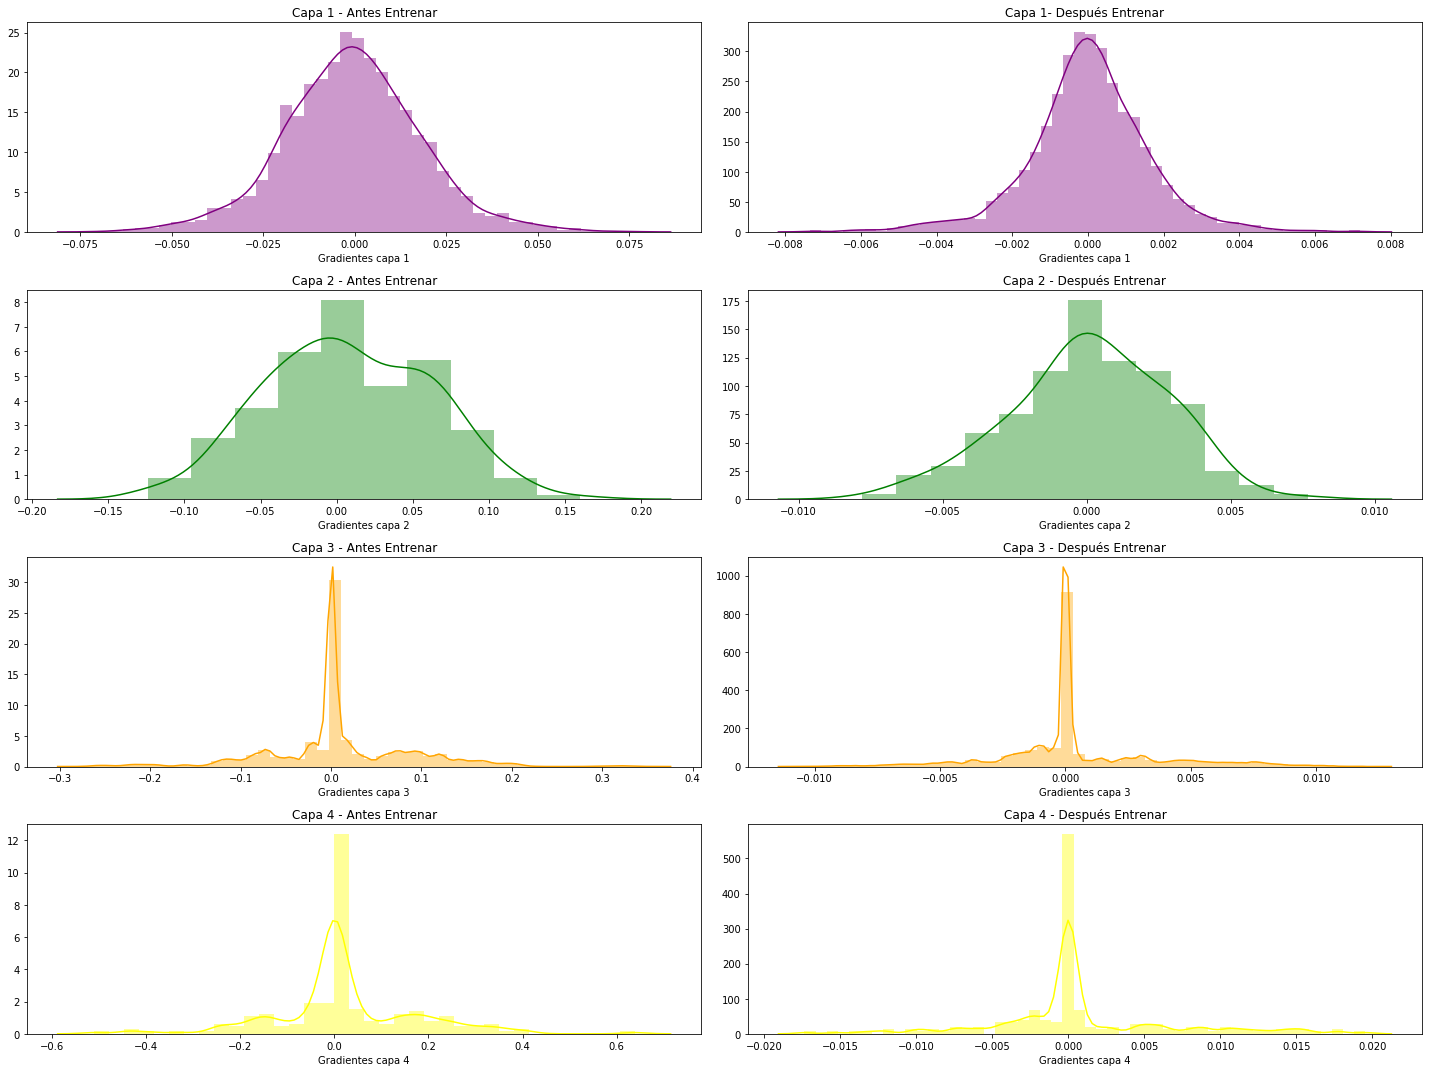

In [17]:
#e-2
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')


###calculate gradients
from keras import backend as K
import tensorflow as tf
loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
#print(gradients)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

pesos_0_i = evaluated_gradients[0].flatten()
pesos_1_i = evaluated_gradients[1].flatten()
pesos_2_i = evaluated_gradients[2].flatten()
pesos_3_i = evaluated_gradients[3].flatten()

history = model.fit(X_train_scaled, y_train, epochs=300, verbose=False)

loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
#print(gradients)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

pesos_0_f = evaluated_gradients[0].flatten()
pesos_1_f = evaluated_gradients[1].flatten()
pesos_2_f = evaluated_gradients[2].flatten()
pesos_3_f = evaluated_gradients[3].flatten()

#estos histogramas aun son place-holder
import matplotlib.pyplot as plt
A,B = plt.subplots(4,2,figsize=(20,15))

sns.distplot(pesos_0_i, axlabel="Gradientes capa 1",
             label='Gradientes capa 1', color='purple', ax=B[0,0]);
B[0,0].set_title("Capa 1 - Antes Entrenar")

sns.distplot(pesos_0_f, axlabel="Gradientes capa 1",
             label='Gradientes capa 1', color='purple', ax=B[0,1]);
B[0,1].set_title("Capa 1- Después Entrenar")

sns.distplot(pesos_1_i, axlabel="Gradientes capa 2",
             label='Gradientes capa 2', color='green', ax=B[1,0]);
B[1,0].set_title("Capa 2 - Antes Entrenar")

sns.distplot(pesos_1_f, axlabel="Gradientes capa 2",
             label='Gradientes capa 2', color='green', ax=B[1,1]);
B[1,1].set_title("Capa 2 - Después Entrenar")

sns.distplot(pesos_2_i, axlabel="Gradientes capa 3",
             label='Gradientes capa 3', color='orange', ax=B[2,0]);
B[2,0].set_title("Capa 3 - Antes Entrenar")

sns.distplot(pesos_2_f, axlabel="Gradientes capa 3",
             label='Gradientes capa 3', color='orange', ax=B[2,1]);
B[2,1].set_title("Capa 3 - Después Entrenar")

sns.distplot(pesos_3_i, axlabel="Gradientes capa 4",
             label='Gradientes capa 4', color='yellow', ax=B[3,0]);
B[3,0].set_title("Capa 4 - Antes Entrenar")

sns.distplot(pesos_3_f, axlabel="Gradientes capa 4",
             label='Gradientes capa 4', color='yellow', ax=B[3,1]);
B[3,1].set_title("Capa 4 - Después Entrenar")

plt.tight_layout()
A.show();


La inicialización de He hasta ahora ha demostrado ser la mejor al utilizarla con ReLU, las distribuciones de los gradientes mantienen su forma y pierden mucha menos varianza que en el resto de las arquitecturas discutidas hasta el momento.


# hablar de la comparacion

f:\anaconda2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/300
379/379 [==============================] - 0s 470us/step - loss: 407251289.9576
Epoch 2/300
379/379 [==============================] - 0s 206us/step - loss: 132206511184212.4375
Epoch 3/300
379/379 [==============================] - 0s 177us/step - loss: 1987314079691459170140160.0000
Epoch 4/300
379/379 [==============================] - 0s 164us/step - loss: 228725801104730870610860956744417280.0000
Epoch 5/300
379/379 [==============================] - 0s 172us/step - loss: nan
Epoch 6/300
379/379 [==============================] - 0s 169us/step - loss: nan
Epoch 7/300
379/379 [==============================] - 0s 156us/step - loss: nan
Epoch 8/300
379/379 [==============================] - 0s 150us/step - loss: nan
Epoch 9/300
379/379 [==============================] - 0s 153us/step - loss: nan
Epoch 10/300
379/379 [==============================] - 0s 150us/step - loss: nan
Epoch 11/300
379/379 [==============================] - 0s 137us/step - loss: nan
Epoch 12/300
3

379/379 [==============================] - 0s 148us/step - loss: nan
Epoch 100/300
379/379 [==============================] - 0s 137us/step - loss: nan
Epoch 101/300
379/379 [==============================] - 0s 148us/step - loss: nan
Epoch 102/300
379/379 [==============================] - 0s 150us/step - loss: nan
Epoch 103/300
379/379 [==============================] - 0s 156us/step - loss: nan
Epoch 104/300
379/379 [==============================] - 0s 148us/step - loss: nan
Epoch 105/300
379/379 [==============================] - 0s 156us/step - loss: nan
Epoch 106/300
379/379 [==============================] - 0s 158us/step - loss: nan
Epoch 107/300
379/379 [==============================] - 0s 148us/step - loss: nan
Epoch 108/300
379/379 [==============================] - 0s 153us/step - loss: nan
Epoch 109/300
379/379 [==============================] - 0s 172us/step - loss: nan
Epoch 110/300
379/379 [==============================] - 0s 158us/step - loss: nan
Epoch 111/300
379/

379/379 [==============================] - 0s 145us/step - loss: nan
Epoch 198/300
379/379 [==============================] - 0s 150us/step - loss: nan
Epoch 199/300
379/379 [==============================] - 0s 145us/step - loss: nan
Epoch 200/300
379/379 [==============================] - 0s 166us/step - loss: nan
Epoch 201/300
379/379 [==============================] - 0s 169us/step - loss: nan
Epoch 202/300
379/379 [==============================] - 0s 153us/step - loss: nan
Epoch 203/300
379/379 [==============================] - 0s 153us/step - loss: nan
Epoch 204/300
379/379 [==============================] - 0s 180us/step - loss: nan
Epoch 205/300
379/379 [==============================] - 0s 156us/step - loss: nan
Epoch 206/300
379/379 [==============================] - 0s 153us/step - loss: nan
Epoch 207/300
379/379 [==============================] - 0s 153us/step - loss: nan
Epoch 208/300
379/379 [==============================] - 0s 150us/step - loss: nan
Epoch 209/300
379/

379/379 [==============================] - 0s 153us/step - loss: nan
Epoch 296/300
379/379 [==============================] - 0s 150us/step - loss: nan
Epoch 297/300
379/379 [==============================] - 0s 172us/step - loss: nan
Epoch 298/300
379/379 [==============================] - 0s 193us/step - loss: nan
Epoch 299/300
379/379 [==============================] - 0s 182us/step - loss: nan
Epoch 300/300
379/379 [==============================] - 0s 180us/step - loss: nan


f:\anaconda2\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


ValueError: cannot convert float NaN to integer

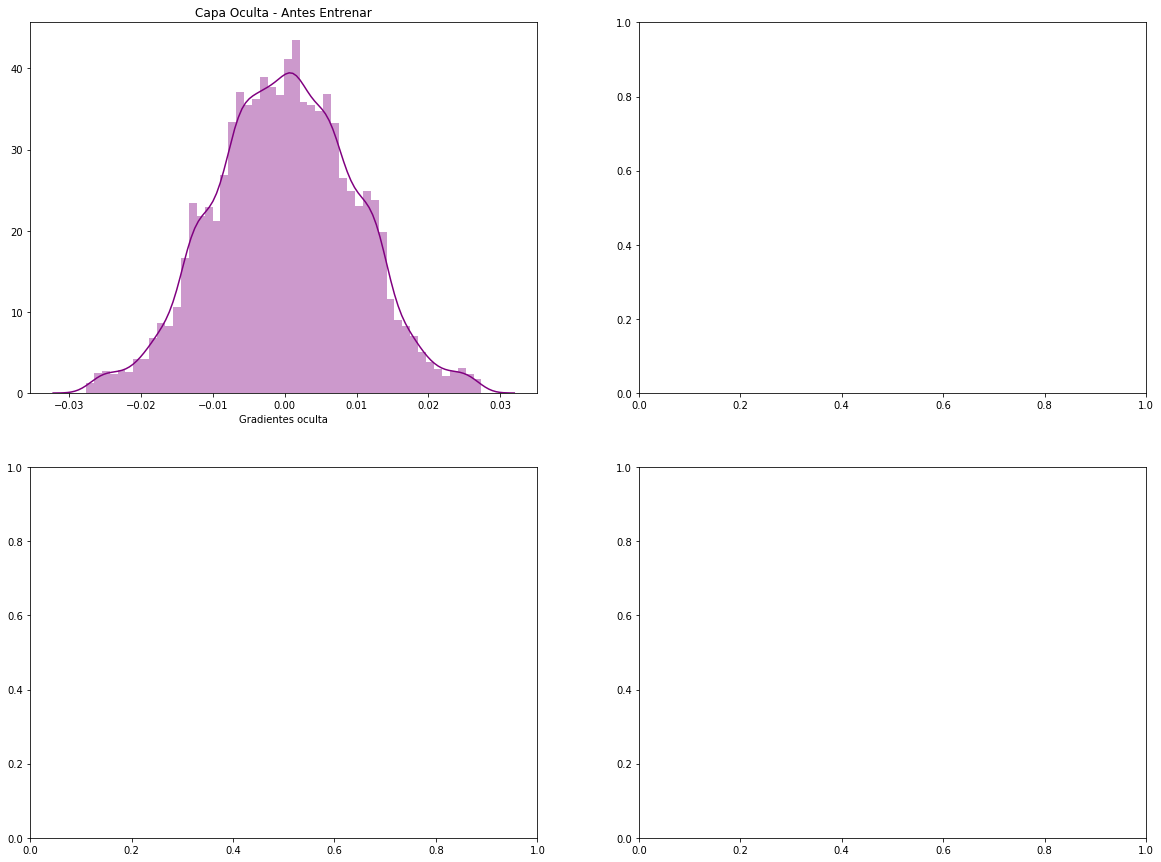

In [2]:
#f
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
import seaborn as sns
%matplotlib inline


sgd = SGD(lr=0.01)
model = Sequential()
model.add(Dense(1000, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
model.compile(optimizer=sgd,loss='mean_squared_error')

###calculate gradients
from keras import backend as K
import tensorflow as tf
loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
#print(gradients)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

pesos_0_i = evaluated_gradients[0].flatten()
pesos_s_i =evaluated_gradients[-1].flatten()

model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
    verbose=1)#, validation_data=(X_test_scaled.as_matrix(), y_test))

###calculate gradients
from keras import backend as K
import tensorflow as tf
loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
#print(gradients)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

pesos_0_f = evaluated_gradients[0].flatten()
pesos_s_f =evaluated_gradients[-1].flatten()

#estos histogramas aun son place-holder
import matplotlib.pyplot as plt
A,B = plt.subplots(2,2,figsize=(20,15))

sns.distplot(pesos_0_i, axlabel="Gradientes oculta",
             label='Gradientes oculta', color='purple', ax=B[0,0]);
B[0,0].set_title("Capa Oculta - Antes Entrenar")

sns.distplot(pesos_0_f, axlabel="Gradientes oculta",
             label='Gradientes oculta', color='purple', ax=B[0,1]);
B[0,1].set_title("Capa Oculta- Después Entrenar")

sns.distplot(pesos_s_i, axlabel="Gradientes salida",
             label='Gradientes salida', color='green', ax=B[1,0]);
B[1,0].set_title("Capa Salida - Antes Entrenar")

sns.distplot(pesos_s_f, axlabel="Gradientes salida",
             label='Gradientes salida', color='green', ax=B[1,1]);
B[1,1].set_title("Capa Salida - Después Entrenar")

plt.tight_layout()
A.show();


# la red diverge y el profe hablo sobre porque en clases.